In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

ModuleNotFoundError: No module named 'missingno'

In [30]:
TRAIN_FEATURE_PATH = r'../../Datasets/train_features.csv'
TRAIN_LABEL_PATH = r'../../Datasets/train_labels.csv'
TEST_PATH = r'../../Datasets/test_features.csv'


In [31]:
train_feature_dat = pd.read_csv(TRAIN_FEATURE_PATH)
train_label_dat = pd.read_csv(TRAIN_LABEL_PATH)
test_dat = pd.read_csv(TEST_PATH)

In [37]:
train_dat = pd.merge(train_feature_dat, train_label_dat, left_index=True, right_index=True)

# General

In [38]:
train_dat

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,1
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,0


In [40]:
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [41]:
train_dat.duplicated().sum()

0

In [42]:
train_dat.duplicated().sum()

0

In [43]:
train_dat.isna().sum()

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
dtype: int64

# Unique Values

In [45]:
cols = train_dat.columns

for col in cols:
    print(f"{col} -> nunique: {train_dat[col].nunique()} \n -> unique val: {train_dat[col].unique()} \n ----------------- \n")

tahun_kelahiran -> nunique: 76 
 -> unique val: [1979 1950 1966 1961 1970 1952 1963 1959 1957 1975 1953 1968 1983 1977
 1973 1969 1980 1965 1960 1982 1971 1972 1958 1944 1986 1962 1967 1984
 1976 1964 1954 1956 1978 1991 1981 1946 1974 1947 1955 1989 1945 1948
 1990 1951 1988 1949 1985 1943 1996 1987 1909 1993 1992 1925 1912 1999
 1941 1995 1994 1916 1942 1998 1899 1902 1922 2000 1918 1920 1997 1929
 1940 1932 1924 1900 1914 1908] 
 ----------------- 

pendidikan -> nunique: 6 
 -> unique val: ['Sarjana' 'Magister' 'SMA' 'SMP' 'Doktor' nan '5'] 
 ----------------- 

status_pernikahan -> nunique: 6 
 -> unique val: ['Rencana Menikah' 'Menikah' 'Sendiri' 'Cerai' nan 'Cerai Mati' '5'] 
 ----------------- 

pendapatan -> nunique: 3622 
 -> unique val: [           nan 8.40630000e+07 1.27532564e+08 ... 1.04621000e+08
 1.10850000e+08 1.30512000e+08] 
 ----------------- 

jumlah_anak_balita -> nunique: 3 
 -> unique val: [ 0. nan  1.  2.] 
 ----------------- 

jumlah_anak_remaja -> nunique: 3 

# Per Kolom

In [46]:
train_clean = train_dat.copy()

In [47]:
#tanggal_menjadi_anggota -> di drop karena banyak null
train_clean.drop(columns=["tanggal_menjadi_anggota"], inplace=True)

# EDA

## Univariate Analysis

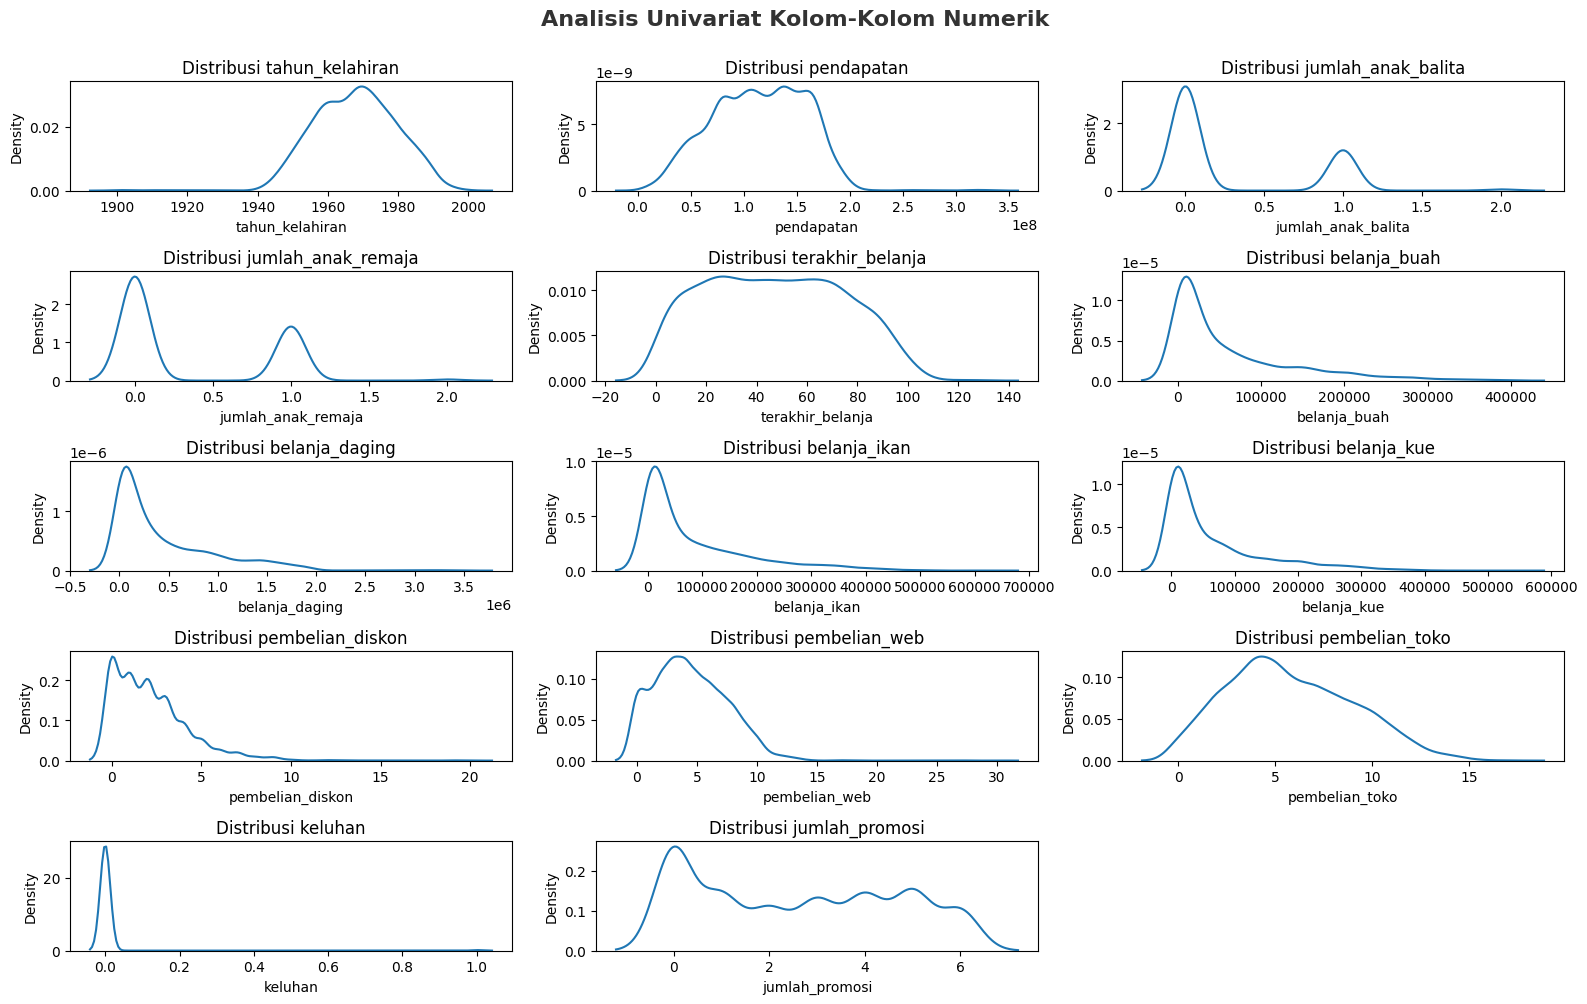

In [49]:
def univariate_analysis(preped_train, height=10):
    """
    Melakukan analisis univariat pada kolom-kolom numerik dalam DataFrame.

    Parameters:
        data (DataFrame): DataFrame yang akan dianalisis.
        tinggi (int, optional): Tinggi gambar subplot dalam inci (default: 10).

    Returns:
        None

    Contoh Penggunaan:
        analisis_univariat(data_viz, tinggi=10)
    """
    # Memfilter DataFrame untuk hanya mengandung kolom-kolom numerik
    numerical_columns = preped_train.select_dtypes(include=['number'])
    
    # Menentukan jumlah baris dan kolom untuk subplot secara dinamis
    num_numerical_cols = len(numerical_columns.columns)
    num_subplot_cols = 3  # Number of columns for subplots
    
    num_subplot_rows = (num_numerical_cols + num_subplot_cols - 1) // num_subplot_cols 
    
    # Membuat subplot
    plt.figure(figsize=(16, height))
    plt.suptitle('Analisis Univariat Kolom-Kolom Numerik', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
    for i, column in enumerate(numerical_columns.columns):
        plt.subplot(num_subplot_rows, num_subplot_cols, i + 1)
        sns.kdeplot(data=numerical_columns[column])
        plt.title(f'Distribusi {column}')
    
    plt.tight_layout()
    plt.show()

univariate_analysis(train_clean, height=10)

In [52]:
cat_cols = ['pendidikan', 'status_pernikahan']

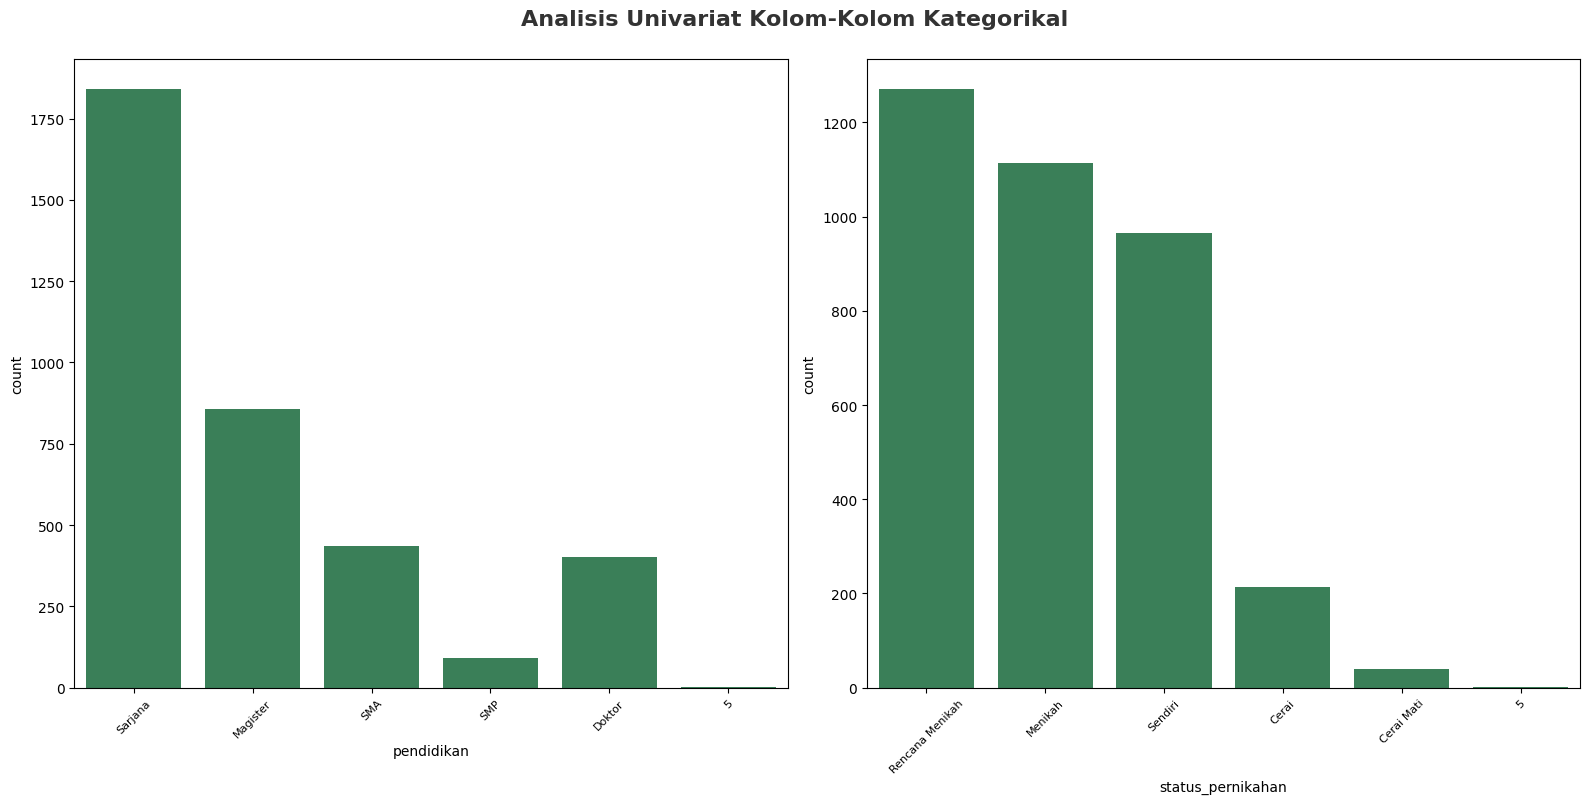

In [53]:
# Menampilkan analisis univariate untuk kolom kategorikal
plt.figure(figsize=(16, 8))
plt.suptitle('Analisis Univariat Kolom-Kolom Kategorikal', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
num_cat_cols = len(cat_cols)
num_rows = (num_cat_cols + 1) // 2  # Menghitung jumlah baris yang diperlukan untuk 2 kolom
for i in range(0, num_cat_cols):
    plt.subplot(num_rows, 2, i+1)   # Menggunakan 2 kolom
    sns.countplot(x=train_clean[cat_cols[i]], color='seagreen')
    plt.xticks(rotation=45, fontsize=8)  # Memutar label sumbu x sebesar 45 derajat dan mengatur fontsize
    plt.tight_layout()

In [ ]:
mno.matrix(preped_train, figsize=(10, 5), fontsize=9)